<a href="https://colab.research.google.com/github/KaniniKagendo/Dataset-Credit-Risk/blob/main/RMA_CreditRisk_TeamCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSA 8304: RISK MANAGEMENT ANALYTICS CREDIT RISK MODELING GROUPWORK

# Credit Risk Modeling Notebook

## Introduction
LendingClub stands as the largest peer-to-peer lending platform globally. The objective of this notebook is to delve into risk analytics within the banking and financial services sector. It aims to explore how data is employed to mitigate the potential financial losses associated with lending to customers.

## Problem Statement
LendingClub, a specialized lender for urban customers, faces the task of evaluating loan applications and making approval decisions based on applicant profiles. This decision carries two types of risks:

a) Risk of Missed Business Opportunity: When an applicant is likely to repay the loan, choosing not to approve the loan would result in a loss of potential business for the company.

b) Risk of Financial Loss: On the other hand, if an applicant is unlikely to repay the loan and is at high risk of defaulting, approving the loan could potentially lead to a financial loss for the company.

Thus, LendingClub must carefully assess each loan application, aiming to strike a balance between maximizing business opportunities by approving loans from creditworthy applicants and minimizing the potential for financial losses resulting from defaults.

This section aims to:
- Provide an overview of the credit risk modeling problem.
- Clearly define the problem statement and the objective of the analysis.
- Outline the data sources and any relevant background information.

## Data Understanding and Exploration
The dataset provides information on past loan applicants and their default status. The goal is to identify patterns that indicate the probability of an applicant defaulting. This information guides decisions like loan denial, adjusting loan amounts, offering higher interest rates to risky applicants, and more.
When individuals apply for a loan, the company can take two types of decisions:

1) Loan Acceptance: If the loan is approved, three scenarios can arise:

a) Fully Paid: The applicant successfully repays the loan, including principal and interest.

b) Current: The applicant is currently making loan repayments, and the loan term is ongoing. They are not considered as defaulting.

c) Charged-off: The applicant fails to make timely loan repayments, resulting in default.

2) Loan Rejection: The company rejects the loan application if the applicant does not meet their requirements. As a result, there is no transactional history available for these applicants in the dataset.

By analyzing the data, patterns can be identified to evaluate the likelihood of defaulting. This enables the company to make informed decisions regarding loan approvals, manage risk, and adjust interest rates accordingly.

This section incorporates the below processes:
- Import the necessary libraries and load the dataset.
- Perform initial data exploration to understand the structure and characteristics of the data.
- Handle missing values, outliers, and perform necessary data preprocessing steps.
- Conduct descriptive statistics and visualizations to gain insights into the data through EDA.

## Feature Engineering
- Perform feature selection or creation based on domain knowledge and exploratory analysis.
- Handle categorical variables by encoding or transforming them appropriately.
- Scale or normalize numerical features if required.
- Split the dataset into training and testing sets.

## Model Development and Evaluation
- Select appropriate credit risk modeling algorithms, such as logistic regression, random forests, or gradient boosting.
- Train the selected models on the training data.
- Evaluate model performance using suitable metrics like accuracy, precision, recall, and F1-score.
- Fine-tune the models through hyperparameter optimization and cross-validation.
- Compare and analyze the results of different models.

## Model Interpretation
- Interpret the trained models to understand the important features and their impact on credit risk.
- Visualize the model results, such as feature importance, coefficients, or decision boundaries.

## Model Deployment and Conclusion
- Save the trained model for future use or deployment.
- Summarize the findings and conclusions from the analysis.
- Provide recommendations or insights based on the results.
- Discuss any limitations or areas for future improvement.

## References and Acknowledgments
- List any references, data sources, or external libraries used.
- Acknowledge any collaborators, open-source projects, or code snippets used.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Libraries and Datasets

In [ ]:
# # install package if not installed
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install statsmodels


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#accepted_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')
# accepted_df = pd.read_csv('/content/accepted_2007_to_2018Q4.csv')
accepted_df=pd.read_csv('/content/drive/MyDrive/Accepted and Rejected Loans Data RMA/accepted_2007_to_2018Q4.csv')

In [ ]:
#rejected_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv')
# rejected_df = pd.read_csv('/content/rejected_2007_to_2018Q4.csv')
rejected_df=pd.read_csv('/content/drive/MyDrive/Accepted and Rejected Loans Data RMA/rejected_2007_to_2018Q4.csv')

# Data understanding

In [ ]:
# check the first 5 rows of the data
rejected_df.head()


In [ ]:
# check the last 5 rows of the data
rejected_df.tail()

In [ ]:
# check the first 5 rows of the data
accepted_df.head()

In [ ]:
# check the last 5 rows of the data
accepted_df.head()

In [ ]:
# check the shape of the data
rejected_df.shape


In [ ]:
# check the shape of the data
accepted_df.shape

In [ ]:
# check the info of the data
rejected_df.info()

In [ ]:
# check the info of the data
accepted_df.info()

In [ ]:
# check the columns of the data
rejected_df.columns


In [ ]:
# check the columns of the data
accepted_df.columns

In [ ]:
# check the data types of the data
rejected_df.dtypes


In [ ]:
# check the data types of the data
accepted_df.dtypes

In [ ]:
# check the missing values in the data
rejected_df.isnull().sum()

In [ ]:
# check the missing values in the data
accepted_df.isnull().sum()

In [ ]:
# check the unique values in the data
rejected_df.nunique()


In [ ]:
# check the unique values in the data
accepted_df.nunique()

### Data cleaning

In [ ]:
# from accepted_df, drop member_id column because it only has null values
accepted_df.drop('member_id', axis=1, inplace=True)

In [ ]:
# In accepted_df, drop columns with more than 50 percent missing values
accepted_df.dropna(thresh=0.5*len(accepted_df), axis=1, inplace=True)

In [ ]:
# in rejected_df, change the data type of Application Date to datetime
rejected_df['Application Date'] = pd.to_datetime(rejected_df['Application Date'])

In [ ]:
# In rejedted_df, drop columns with more than 50 percent missing values
rejected_df.dropna(thresh=0.5*len(rejected_df), axis=1, inplace=True)

#@ Joe please validate this and revert by Friday. Thanks

In [ ]:
accepted_df.columns

In [ ]:
rejected_df.columns

In [ ]:
rejected_df.info()

https://github.com/dosei1/Lending-Club-Loan-Data/blob/master/LCDataDictionary.csv

Dictionary link

In [ ]:
# Feature trimming (20 features)

trim=["addr_state","annual_inc","dti","emp_length","fico_range_high","fico_range_low",
     "grade","home_ownership","installment","int_rate","loan_amnt","loan_status","mort_acc",
     "open_acc","pub_rec_bankruptcies","purpose","revol_util","sub_grade","term","total_acc"]


accepted_trim=accepted_df[trim]
accepted_trim.shape

In [ ]:
# Chceking the info of accepted_trim
accepted_trim.info()

In [ ]:
# check for null values in accpepted_trim
accepted_trim.isnull().sum()

In [ ]:
# check for null values in rejected_df
rejected_df.isnull().sum()

In [ ]:
# check the shape of rejected_df
accepted_trim.shape

In [ ]:
# check the shape of accpepted_trim
rejected_df.shape

In [ ]:
# check for unique values in rejected_df
accepted_trim.nunique()

In [ ]:
# check for unique values in rejected_df
rejected_df.nunique()

**accepted_trim dataset:** This dataset is about approved loans from the Lending
Club. It contains 2,260,701 entries (rows) and 20 features (columns). Here's what each column likely represents:



1.   addr_state: The U.S. state of the borrower.
2.   annual_inc: The annual income of the borrower, likely in dollars.

1.   annual_inc: The annual income of the borrower, likely in dollars.
2.   dti: Debt-to-income ratio of the borrower.

5.   emp_length: Employment length of the borrower, possibly in years.

1.   fico_range_high and fico_range_low: The range of FICO scores for the borrower. FICO scores are a type of credit score used by lenders to help assess credit risk.
2.   grade and sub_grade: Lending Club's grading system for the creditworthiness of the borrower.
2.   home_ownership: The home ownership status of the borrower (e.g., rent, own, mortgage).
1.   installment: The monthly payment owed by the borrower.
int_rate: The interest rate on the loan.
1.   loan_amnt: The amount of the loan.
2.   loan_status: The status of the loan (e.g., fully paid, charged off).
2.   mort_acc: Number of mortgage accounts.
1.   open_acc: Number of open credit lines in the borrower's credit file.
1.   pub_rec_bankruptcies: Number of public record bankruptcies.
1.   purpose: Purpose of the loan.
2.   revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
2.   term: The term of the loan (e.g., 36 months, 60 months).
2.   total_acc: The total number of credit lines currently in the borrower's credit file.


**rejected_df dataset**: This dataset is about loan applications that were rejected by the Lending Club. It contains 27,648,741 entries and 8 features.

Here's what each column represents:
1.   Amount Requested: The amount of the loan requested by the applicant.
2.   Application Date: The date the loan application was submitted.
2.   Loan Title: The title or description of the loan provided by the applicant.
1.   Debt-To-Income Ratio: The debt-to-income ratio of the applicant.
1.   Zip Code: The zip code of the applicant.
2.   State: The U.S. state of the applicant
2.   Employment Length: The length of the applicant's employment, possibly in years.
1.   Policy Code: An internal code representing the lending policy.
2.   List item



Each dataset has a number of missing or null values in various columns. These missing values could potentially introduce bias or inaccuracies in any analysis or model built using this data, and will need to be handled appropriately during the data cleaning process.

The unique values for categorical variables like addr_state or grade could represent the number of categories in the data. For numerical variables like annual_inc or loan_amnt, a high number of unique values could indicate a wide range of values, and may require further investigation to understand their distribution.

In [ ]:
# drop rows with null values in accepted_trim and rejected_df
accepted_trim.dropna(inplace=True)
rejected_df.dropna(inplace=True)

In [ ]:
# Check the shape
accepted_trim.shape

# Dropped 197,263 rows with null values

In [ ]:
# Check the shape
rejected_df.shape

# Dropped 953,770 rows with null values

In [ ]:
# Check for outliers
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns.tolist():
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
    return df

# Removing outliers from the dataframes
accepted_trim = remove_outliers(accepted_trim)
rejected_df = remove_outliers(rejected_df)

In [ ]:
accepted_trim.head()

In [ ]:
def extract_term(s):
    if isinstance(s, str):  # check if it's a string
        return int(s.split()[0]), s.split()[1]
    else:
        return None, None  # handle NaN or unexpected values

# Apply the function to the 'term' column
accepted_trim['Term Number'], accepted_trim['Term Unit'] = zip(*accepted_trim['term'].map(extract_term))


In [ ]:
rejected_df.head()

In [ ]:
print(rejected_df['Employment Length'].unique())

In [ ]:
def extract_employment_length(s):
    if s == '< 1 year':
        return 0, 'less_than_year'
    elif s == '10+ years':
        return 10, 'ten_or_more_years'
    elif isinstance(s, str):  # check if it's a string
        return int(s.split()[0]), 'exact_years'
    else:
        return None, None  # handle NaN or unexpected values

# Apply the function to the 'Employment Length' column
rejected_df['Employment Length Number'], rejected_df['Employment Length Context'] = zip(*rejected_df['Employment Length'].map(extract_employment_length))


The function extract_employment_length takes a string from the Employment Length column and returns a tuple with the number of years and the context. The map() function is then used to apply this function to each value in the column, and the results are unpacked into two new columns in the DataFrame.

After running this code, you should have two new columns in your DataFrame: Employment Length Number, which contains the number of years of employment as an integer, and Employment Length Context, which contains the context as a string. You can then use these columns for further analysis or modeling.

In [ ]:
# Remove the '%' sign and convert to float
rejected_df['Debt-To-Income Ratio'] = rejected_df['Debt-To-Income Ratio'].str.replace('%', '').astype(float)


In [ ]:
# drop rows with null values in accepted_trim and rejected_df
accepted_trim.dropna(inplace=True)
rejected_df.dropna(inplace=True)

In [ ]:
accepted_trim.head()

In [ ]:
rejected_df.head()

# Exploratory Data Analysis (EDA)

In [ ]:
accepted_trim.columns

In [ ]:
rejected_df.columns

####EDA for Accepted_trim (Approved Loans of the Lending Club)

In [ ]:
# A Visualization of the distribution of the status of loans disbursed from the accepted loans
plt.figure(figsize=(10, 5))
sns.countplot(data=accepted_trim, x='loan_status')
plt.title('Loan Status Count')
plt.xticks(rotation=45)
plt.show()

It is apparent that loans classified as "Fully paid" exhibit a significantly higher count in comparison to those categorized as "Defaulted," thereby highlighting a notable disparity in their respective statuses.

In [ ]:
#We can choose between the above and the below, which works for us :)
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=accepted_trim,x="loan_status",hue="term",palette='dark')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status distribution', size=20)

In [ ]:
accepted_trim.groupby('loan_status').describe()

From the above table, we're able to see the statistical distribution of the Loan Status variable. It is evident that there is lot of data about current loan , charged off loan and Fully paid loans.

In [ ]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=accepted_trim,x="emp_length",palette='spring')
ax.set(xlabel='Length of Employmnet', ylabel='')
ax.set_title('Loan status count vs Employment length', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
accepted_trim['emp_length'].value_counts()

From the above illustration and summary, A clear pattern emerges wherein employees with a tenure exceeding 10 years demonstrate a distinct advantage in terms of loan accessibility compared to their counterparts with relatively shorter durations of employment.

In [ ]:
# A Visualization of the distribution of loan amounts
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim, x='loan_amnt', kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.show()

From the above visualization, a conspicuous pattern emerges, revealing a discernible prevalence of loans disbursed in the 10,000 currency unit range, surpassing the allocation of funds in the remaining loan categories.

In [ ]:
# A Visualization of the distribution of interest rates
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim, x='int_rate', kde=True, bins=30)
plt.title('Interest Rate Distribution')
plt.show()

Based on the visual analysis presented above, it appears that loans with a 15% interest rate have exhibited the highest disbursal frequency throughout the observed period

In [ ]:
#Visualizing the Loan Grade Count
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=accepted_trim,y="grade",palette='rocket')
ax.set_title('Loan Grades count', size=20)
plt.show()

Upon careful observation of the  visualization, a salient inference arises, unequivocally indicating that loan grades B and C exhibit a notable predominance in terms of their count.

In [ ]:
# An Analysis of the distribution of loan amounts across different loan grades
plt.figure(figsize=(10, 5))
sns.boxplot(data=accepted_trim, x='grade', y='loan_amnt', order=sorted(accepted_trim['grade'].unique()))
plt.title('Loan Amount Distribution Across Loan Grades')
plt.show()

The above is a depiction of the distribution of loan amounts as compared to the respective Loan grades.

In [ ]:
#An Analysis of the distribution of interest rates across different loan grades
plt.figure(figsize=(10, 5))
sns.boxplot(data=accepted_trim, x='grade', y='int_rate', order=sorted(accepted_trim['grade'].unique()))
plt.title('Interest Rate Distribution Across Loan Grades')
plt.show()

From the above visual, It looks like F and G subgrades have the highest interest rates as compared to the rest.

In [ ]:
#An Analysis of the distribution of annual incomes
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim[accepted_trim['annual_inc'] < 300000], x='annual_inc', kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

From the above visual, the loanees with the annual income of 50,000 have access to the most loans than their counterparts.

In [ ]:
#An Analysis the distribution of debt-to-income ratios
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim, x='dti', kde=True, bins=30)
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

This discernibly illustrates that when an individual's debt-to-income ratio is elevated, there is a greater likelihood of loan default in the presence of higher interest rates. It seems that the smaller the dti the more likely that the loan will not be paid.

In [ ]:
#A Visualization of the Purpose of the loans versus the respective amounts
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=accepted_trim,x="purpose",y='loan_amnt',palette='spring')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
accepted_trim['purpose'].value_counts()

The chart above depicts the purpose for which the loanees take up loans. It's apparent that most take loans for Debt Consolidation, small businesses, credit card settlement and housing.

In [ ]:
#An Analysis of the Home Ownership Vs the Annual Income
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=accepted_trim,x="home_ownership",y='annual_inc',palette='viridis')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.show()

In the above comparison, It is evident that loanees with a higher annual income opt for a Mortgage package when it comes to Home Ownership.

In [ ]:
# Analyze the distribution of loan amounts and interest rates by loan grade and loan status using violin plots
# plt.figure(figsize=(12, 6))
for grade in sorted(accepted_trim['grade'].unique()):
    df_grade = accepted_trim[accepted_trim['grade'] == grade]
    sns.violinplot(data=df_grade, x='loan_status', y='loan_amnt', inner='quartile')
    plt.title(f'Loan Amount Distribution by Loan Status and Grade {grade}')
    plt.xlabel('Loan Status')
    plt.ylabel('Loan Amount (in USD)')
    plt.show()

    sns.violinplot(data=df_grade, x='loan_status', y='int_rate', inner='quartile')
    plt.title(f'Interest Rate Distribution by Loan Status and Grade {grade}')
    plt.xlabel('Loan Status')
    plt.ylabel('Interest Rate')
    plt.show()

In [ ]:
# Plotting a heatmap for the Accepted Loans
plt.figure(figsize=(15,10))
sns.heatmap(accepted_trim.corr(),annot=True)
plt.show()

In [ ]:
#An Analysis of the correlation matrix between numerical variables
plt.figure(figsize=(10, 10))
sns.heatmap(accepted_trim[['annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'installment', 'int_rate', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec_bankruptcies', 'revol_util', 'total_acc', 'Term Number']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

There's a strong correlation between "loan_amnt" the "installment" feature.

In [ ]:
# Dividing the features into categorical and numerical
categorical=[feature for feature in accepted_trim.columns if accepted_trim[feature].dtype=='object']
numerical=[feature for feature in accepted_trim.columns if feature not in categorical]

In [ ]:
print("Categorical columns:",categorical)
print("Numerical columns:",numerical)

In [ ]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=accepted_trim,column=numerical)
plt.tight_layout()

In [ ]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=accepted_trim,column=numerical)
plt.tight_layout()

# Feature Engineering

In [ ]:
accepted_trim.info()

In [ ]:
accepted_trim['loan_status'].value_counts(dropna=False)

In [ ]:
accepted_trim['loan_status'].value_counts(normalize=True)

Setting up the target variable. We create a Loan Status Variable 'Current or Good', vs 'Default or Bad' based on values provided in the loan_status column.

In [ ]:
#Setting up the target variable 'loan_status_log'

def loans_classification(string):
    if "Current" in string:
        return 1
    elif "Fully Paid" in string:
        return 1
    elif "In Grace Period" in string:
        return 1
    elif "Late" in string:
        return 0
    elif "Charged Off" in string:
        return 0

accepted_trim['loan_status_log'] = accepted_trim['loan_status'].map(loans_classification)
accepted_trim.head()

In [ ]:
accepted_trim['loan_status_log'].value_counts()

In [ ]:
accepted_trim['loan_status_log'].value_counts(normalize=True)

Transforming the 'emp_length' variable.

In [ ]:
accepted_trim['emp_length'].unique()

In [ ]:
emp_length_map = {'< 1 year': 0,
                  '1 year': 1,
                  '2 years': 2,
                  '3 years': 3,
                  '4 years': 4,
                  '5 years': 5,
                  '6 years': 6,
                  '7 years': 7,
                  '8 years': 8,
                  '9 years': 9,
                  '10+ years': 10}

In [ ]:
accepted_trim['emp_length'] = accepted_trim['emp_length'].apply(lambda x: emp_length_map[x])

In [ ]:
accepted_trim['emp_length'].unique()

In [ ]:
accepted_trim.columns

Variable: Purpose

In [ ]:
accepted_trim['purpose'].value_counts()

In [ ]:
def purpose_category(string):
    if "debt_consolidation" in string:
        return 'debt_consolidation'
    elif "credit_card" in string:
        return 'credit_card'
    elif "home_improvement" in string:
        return 'home_improvement'
    elif "major_purchase" in string:
        return 'major_purchase'
    else:
        return 'other'

accepted_trim['purpose'] = accepted_trim['purpose'].map(purpose_category)
accepted_trim['purpose'].value_counts()

One Hot Encoding

In [ ]:
pd.get_dummies(accepted_trim[['home_ownership', 'purpose', 'grade','term']], drop_first=True).head()

In [ ]:
#to dataframe
accepted_trim_dummies = pd.get_dummies(accepted_trim[['home_ownership', 'purpose', 'grade','term']], drop_first=True)

In [ ]:
accepted_trim_dummies.shape

Defining X and y

In [ ]:
X = accepted_trim.drop(columns = ['addr_state', 'grade', 'loan_status', 'term', 'Term Unit', 'Term Number', 'loan_status_log', 'home_ownership', 'purpose', 'sub_grade'],axis=1)
y = accepted_trim[['loan_status_log']]

In [ ]:
X.shape

In [ ]:
X.head()

In [ ]:
y.shape

Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [ ]:
pd.DataFrame(X_scaled).head()

In [ ]:
pd.DataFrame(X_scaled, columns=X.columns).head()

In [ ]:
accepted_trim_sc = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
accepted_trim_sc.shape

In [ ]:
# accepted_trim_new = pd.concat([ accepted_trim_sc, accepted_trim_dummies,], axis=1, join='inner')
accepted_trim_new = pd.concat([accepted_trim_sc, accepted_trim_dummies.reindex(accepted_trim_sc.index)], axis=1)
accepted_trim_new.head()

In [ ]:
accepted_trim_new.shape

In [ ]:
# accepted_trim_new = pd.merge(accepted_trim_dummies, accepted_trim_sc,  left_index=True, right_index=True)
# accepted_trim_new.head()

In [ ]:
accepted_trim_new.shape

In [ ]:
y.shape

In [ ]:
# Drop null values from y
y.dropna(inplace=True)

# Keep only the rows in accepted_trim_new whose index is present in y
accepted_trim_new = accepted_trim_new[accepted_trim_new.index.isin(y.index)]

# Keep only the rows in y whose index is present in accepted_trim_new
y = y[y.index.isin(accepted_trim_new.index)]

print(f"Shape of y: {y.shape}")
print(f"Shape of accepted_trim_new: {accepted_trim_new.shape}")

# Machine Learning Models

The Machine Learning Models detailed herein are:
1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Classifier
4. K Nearest Neighbours


These models leverage advanced algorithms to assess and predict creditworthiness.

The Evaluation Metrics considered for testing out the accuracy of the Machine learning models were Precision, Recall and F1 Scores.

Precision gives the proportion of positive identifications that were indeed correct, reflecting the model's ability to accurately pinpoint actual risky loans. It can be defined as:
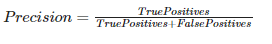


Recall (Sensitivity) determines the proportion of real positives that were correctly identified therefore implying, a highly sensitive test accurately detects credit that carries risk. It can be defined as:

 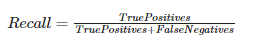


The F1 Score proves valuable in situations where a trade-off between precision and recall is necessary. It is calculated using the following formula:

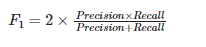

Accuracy refers to the number of correctly predicted risks out of all the data points, providing an overall measure of the model's correctness.

Since our objective is to minimize the Lending Club loss while predicting the risk of loanee default,

A good Recall Rate is desirable since it seeks to identify the maximum amount of loanees that are prone to stop paying their debts, thus a small number of False Negatives is sought.

A good Precision rate is useful in seeking to minimize the number of false positives, avoiding a scenario where loanees are mistakenly classified as defaulters.

The Confusion Matrix comes in handy to check and visualize how the models perform on the test set and the accuracy score tests how well the models predict the loan status of the loanees.

In [ ]:
# # drop rows with null values in accepted_trim and rejected_df
# accepted_trim.dropna(inplace=True)


In [ ]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.3, random_state=42)

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# Initializing the models
lr = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
ln = LinearRegression()

### Logistic Regression

In [ ]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.3, random_state=42)

# Initializing the model
lr = LogisticRegression()

# Logistic Regression Model
model1 = [lr]

# Function to train and evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model in models:
        # Training the model
        model.fit(X_train, y_train.values.ravel())  # y_train.values.ravel() to avoid warnings
        # Making predictions
        y_pred = model.predict(X_test)
        # Evaluating the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")
        # Evaluate model precision
        precision = precision_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, Precision: {precision}")

        # Evaluate model recall
        recall = recall_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, Recall: {recall}")

        # Evaluate model F1 score
        f1 = f1_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, F1 Score: {f1}")

        # Print confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix: \n{conf_matrix}")

# Running the function
train_and_evaluate(model1, X_train, X_test, y_train, y_test)

Accuracy: The accuracy of the model is 0.87, which means that it correctly predicts the outcome (credit risk or no credit risk) for approximately 87% of the data points.

Precision: The precision of the model is also 0.87, indicating that when it predicts a loan to have credit risk, it is correct approximately 87% of the time.

Recall: The recall of the model is 1.0, which means that it correctly identifies all the loans with credit risk. In other words, it does not miss any loans that actually carry risk.

F1 Score: The F1 score is 0.93, which is a harmonic mean of precision and recall. It provides an overall measure of the model's performance, combining its ability to identify risky loans and the accuracy of those identifications.

Confusion Matrix: The confusion matrix shows the model's predictions against the actual values. In this case, the model predicts no loans with credit risk (0) for the entire dataset, while the actual data contains 39,842 loans with credit risk and 266,857 loans without credit risk.

Based on these results, the model seems to be highly accurate and precise in identifying loans without credit risk. However, it fails to identify any loans with credit risk (possibly due to an imbalance in the dataset). Further investigation and analysis are required to determine the reasons behind this and to evaluate the model's overall performance.

###Random Forest Classifier

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint

# Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.2, random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# Train the model
random_search.fit(X_train, y_train.values.ravel())

# Print the best parameters found by RandomizedSearchCV
print(random_search.best_params_)

# Predict the test set results using the best model
y_pred = random_search.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model: {random_search.best_estimator_.__class__.__name__}, Accuracy: {accuracy}")

# Evaluate model precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Model: {random_search.best_estimator_.__class__.__name__}, Precision: {precision}")

# Evaluate model recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Model: {random_search.best_estimator_.__class__.__name__}, Recall: {recall}")

# Evaluate model F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Model: {random_search.best_estimator_.__class__.__name__}, F1 Score: {f1}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy: The accuracy of the model is 0.87, indicating that it correctly predicts the outcome (credit risk or no credit risk) for approximately 87% of the data points.

Precision: The precision of the model is 0.76, meaning that when it predicts a loan to have credit risk, it is correct approximately 76% of the time.

Recall: The recall of the model is also 0.87, suggesting that it identifies approximately 87% of the actual loans with credit risk.

F1 Score: The F1 score is 0.81, which combines the precision and recall into a single metric. It provides an overall measure of the model's performance, balancing both the accuracy of predictions and the model's ability to identify true credit risk.

Confusion Matrix: The confusion matrix displays the model's predictions against the actual values. In this case, the model predicts no loans with credit risk (0) for the entire dataset, while the actual data contains 26,508 loans with credit risk and 177,958 loans without credit risk.

Based on these results, the model demonstrates a high accuracy rate, but its precision is relatively low, indicating a significant number of false positive predictions (predicting credit risk when there is none). This suggests that the model may be prone to overestimating the presence of credit risk. Further evaluation and refinement may be required to improve the precision and overall performance of the model in credit assessment tasks.

###Support Vector Classifier

In [ ]:
# # Import necessary libraries
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# # Split the dataset into train and test data
# X_train, X_test, y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.2, random_state=42)

# # Define parameter distribution
# param_dist = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# # Initialize the SVC model
# svc = SVC()

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# # Train the model
# random_search.fit(X_train, y_train.values.ravel())

# # Print the best parameters found by RandomizedSearchCV
# print(random_search.best_params_)

# # Predict the test set results using the best model
# y_pred = random_search.predict(X_test)

# # Evaluate model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Accuracy: {accuracy}")

# # Evaluate model precision
# precision = precision_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Precision: {precision}")

# # Evaluate model recall
# recall = recall_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Recall: {recall}")

# # Evaluate model F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, F1 Score: {f1}")

# # Print confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{conf_matrix}")


 We first define a dictionary param_dist specifying multiple potential values for the C, gamma, and kernel parameters of SVC. Then, we initialize the SVC model and create a RandomizedSearchCV object. We provide the SVC model, the parameter distribution, specify the number of parameter settings that are sampled (n_iter), the number of folds in cross-validation (cv), and use all available CPU cores for computation (n_jobs=-1).

The RandomizedSearchCV object is then fit to the training data, and we print the best parameters found. Finally, we make predictions on the test set using the best model found by RandomizedSearchCV and calculate the model accuracy.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter, which is more computationally efficient than trying every single combination, especially when the number of parameters and their potential values are quite large.

### K Nearest Neighbors

In [ ]:
# # Import necessary libraries
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from scipy.stats import randint
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# # Split the dataset into train and test data
# X_train, X_test, y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.2, random_state=42)

# # Define parameter distribution
# param_dist = {
#     'n_neighbors': randint(1, 50),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]
# }

# # Initialize the KNN Classifier
# knn = KNeighborsClassifier()

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# # Train the model
# random_search.fit(X_train, y_train.values.ravel())

# # Print the best parameters found by RandomizedSearchCV
# print(random_search.best_params_)

# # Predict the test set results using the best model
# y_pred = random_search.predict(X_test)

# # Evaluate model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Accuracy: {accuracy}")

# # Evaluate model precision
# precision = precision_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Precision: {precision}")

# # Evaluate model recall
# recall = recall_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Recall: {recall}")

# # Evaluate model F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, F1 Score: {f1}")

# # Print confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{conf_matrix}")

